In [1]:
!jt -t grade3

# Module 3 Final Project

In [77]:
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
solar = pd.read_csv('solar.csv')

In [3]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11516 entries, 0 to 11515
Data columns (total 32 columns):
region_name                             11516 non-null int64
state_name                              11516 non-null object
lat_max                                 11516 non-null float64
lat_min                                 11516 non-null float64
lng_max                                 11516 non-null float64
lng_min                                 11516 non-null float64
lat_avg                                 11516 non-null float64
lng_avg                                 11516 non-null float64
yearly_sunlight_kwh_kw_threshold_avg    11516 non-null float64
count_qualified                         11516 non-null int64
percent_covered                         11516 non-null float64
percent_qualified                       11516 non-null float64
number_of_panels_n                      11516 non-null int64
number_of_panels_s                      11516 non-null int64
number_of_panels_e

In [4]:
solar.dropna()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
19,19149,Pennsylvania,40.051229,40.026879,-75.041356,-75.092596,40.037404,-75.065705,997.90,4602,...,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,POINT(-75.0657051746548 40.0374044403417)
20,74050,Oklahoma,36.077670,36.076572,-96.066813,-96.067402,36.077193,-96.067100,1097.35,7,...,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,"[[0,5],[5,1],[15,1]]",33.988079,0,POINT(-96.0671000555555 36.0771932333333)
21,19120,Pennsylvania,40.052709,40.012403,-75.096987,-75.138747,40.034398,-75.120887,997.90,6086,...,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,POINT(-75.120887243506 40.0343982932811)
22,19132,Pennsylvania,40.005893,39.986358,-75.150639,-75.190697,39.995681,-75.169645,997.90,5157,...,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,POINT(-75.169645159245 39.9956814907579)
23,19134,Pennsylvania,40.007334,39.977417,-75.087213,-75.131005,39.992451,-75.111935,997.90,7551,...,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,POINT(-75.1119347717865 39.9924510629131)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,18025,Pennsylvania,40.632602,40.631640,-75.390448,-75.394455,40.632179,-75.392770,980.05,5,...,0.000000e+00,0.000000e+00,0.000000e+00,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,POINT(-75.39277012 40.6321787)
11512,91182,California,34.149359,34.148787,-118.140291,-118.141023,34.148964,-118.140715,1405.05,5,...,1.212025e+05,2.327299e+04,3.420987e+04,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,POINT(-118.140715083333 34.148964)
11513,90261,California,33.896309,33.895752,-118.376801,-118.378354,33.896162,-118.377547,1405.05,5,...,1.295576e+05,6.040279e+04,9.014655e+04,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,POINT(-118.37754686 33.89616182)
11514,28281,North Carolina,35.226916,35.226038,-80.844785,-80.845823,35.226438,-80.845268,1091.40,5,...,6.776846e+03,5.439028e+03,1.563796e+04,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,POINT(-80.8452678 35.2264376833333)


In [5]:
len(solar.columns)

32

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
solar

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
0,20303,District of Columbia,38.876371,38.874446,-77.003766,-77.005605,38.875346,-77.004523,1037.00,0,33.333333,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-77.0045229333333 38.8753456)
1,21532,Maryland,39.722246,39.569701,-78.860691,-79.091712,39.651014,-78.930906,971.55,0,0.020812,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-78.9309058462436 39.6510141030593)
2,24069,Virginia,36.655148,36.541640,-79.509898,-79.702540,36.598786,-79.640503,1068.45,0,0.090253,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-79.6405031730145 36.5987864088448)
3,24724,West Virginia,37.359420,37.327022,-81.282143,-81.338330,37.331934,-81.314917,1028.50,0,62.500000,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-81.3149169875 37.331933825)
4,28357,North Carolina,34.961358,34.857796,-79.003998,-79.160387,34.916952,-79.081624,1095.65,0,0.086133,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-79.0816239424634 34.9169522628768)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,18025,Pennsylvania,40.632602,40.631640,-75.390448,-75.394455,40.632179,-75.392770,980.05,5,100.000000,100.000000,0,0,0,0,9637,794.0,9637.0,198.50,2409.25,0.000000,0.000000,0.000000,0.000000,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,POINT(-75.39277012 40.6321787)
11512,91182,California,34.149359,34.148787,-118.140291,-118.141023,34.148964,-118.140715,1405.05,5,100.000000,83.333333,0,303,67,100,578,135.0,1048.0,33.75,262.00,0.000000,121202.463721,23272.988171,34209.874878,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,POINT(-118.140715083333 34.148964)
11513,90261,California,33.896309,33.895752,-118.376801,-118.378354,33.896162,-118.377547,1405.05,5,100.000000,100.000000,53,329,165,242,1602,207.0,2391.0,51.75,597.75,18415.250519,129557.577319,60402.787781,90146.549121,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,POINT(-118.37754686 33.89616182)
11514,28281,North Carolina,35.226916,35.226038,-80.844785,-80.845823,35.226438,-80.845268,1091.40,5,100.000000,83.333333,6,21,20,49,1706,318.0,1802.0,79.50,450.50,1585.371503,6776.846112,5439.027979,15637.955621,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,POINT(-80.8452678 35.2264376833333)


In [8]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11516 entries, 0 to 11515
Data columns (total 32 columns):
region_name                             11516 non-null int64
state_name                              11516 non-null object
lat_max                                 11516 non-null float64
lat_min                                 11516 non-null float64
lng_max                                 11516 non-null float64
lng_min                                 11516 non-null float64
lat_avg                                 11516 non-null float64
lng_avg                                 11516 non-null float64
yearly_sunlight_kwh_kw_threshold_avg    11516 non-null float64
count_qualified                         11516 non-null int64
percent_covered                         11516 non-null float64
percent_qualified                       11516 non-null float64
number_of_panels_n                      11516 non-null int64
number_of_panels_s                      11516 non-null int64
number_of_panels_e

In [9]:
solar.groupby('state_name')['yearly_sunlight_kwh_total'].describe()

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Aguadilla,3.0,5.328143e+07,7.180826e+07,5.243464e+04,1.244496e+07,2.483749e+07,7.989593e+07,1.349544e+08
Alabama,252.0,9.780543e+07,9.996523e+07,8.872634e+03,1.136099e+07,6.596215e+07,1.463428e+08,4.479820e+08
Alaska,19.0,5.732035e+07,4.133662e+07,2.617453e+04,1.644200e+07,7.877428e+07,8.905623e+07,1.265685e+08
Arecibo,2.0,6.197849e+07,4.753305e+07,2.836755e+07,4.517302e+07,6.197849e+07,7.878397e+07,9.558944e+07
Arizona,196.0,3.012398e+08,1.877538e+08,1.296818e+05,1.476746e+08,3.124264e+08,4.290566e+08,8.755768e+08
...,...,...,...,...,...,...,...,...
Virginia,248.0,9.319791e+07,9.830071e+07,2.405863e+03,8.287541e+06,6.140939e+07,1.566888e+08,4.446540e+08
Washington,259.0,1.059082e+08,8.782710e+07,4.538981e+03,3.537438e+07,9.604538e+07,1.515962e+08,6.099479e+08
West Virginia,81.0,4.021468e+07,5.348267e+07,1.991006e+04,1.339463e+06,1.638958e+07,6.172467e+07,2.707920e+08


In [10]:
solar.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets',
       'carbon_offset_metric_tons', 'existing_installs_count', 'center_point'],
      dtype='object')

### Column Descriptions (where applicable)
* `region_name` - zip code
* `lat_avg` & `lng_avg` - center point of indicated locus
* `yearly_sunlight_kwh_kw_threshold_avg` - NEED TO UNDERSTAND THIS ONE BETTER
* `count_qualified` - # of buildings in that locus in Google Maps that are suitable for solar
* `percent_covered` - # of buildings in that locus covered by Google Maps
* `percent_qualified` - percent of buildings in that locus in Google Maps suitable for solar
* `number_of_panels_X` - these five columns explain how many solar panels are currently employed facing the cardinal directions (N,S,E,W)  
    * the **f** stands for FLAT, where the solar panel is on a flat surface
* `number_of_panels_median` - # of panels that fit on the median roof
* `number_of_panels_total` - POTENTIAL total of solar panels for all roof space in locus, assuming panel size of 5.5' x 3.25'  
* `kw_median` - POTENTIAL kW generated by solar for the median building in the locus, assuming *U*kW = 250 Watts  
* `kw_total` - total POTENTIAL kW generated by all roof types in the locus, assuming *U*kW = 250 Watts  
* `yearly_sunlight_kwh_X` - total *U*kW generation for panels facing in the cardinal directions (N,S,E,W)
    * the **f** stands for FLAT, where the solar panel is on a flat surface
* `yearly_sunlight_kwh_median` - kWh/kW/year for median roof in locus
    * **calculated in terms of DC (direct current) not AC (alternating current)
* `yearly_sunlight_kwh_total` - total solar power *U*kW generation for all **roof space** in the locus
* `install_size_kw_buckets` - # of buildings with potential for various installation configurations
    * in a tuple format
    * lower bound - kW
    * upper bound - # of buildings that fit this configuration
* `carbon_offset_metric_tons` - potential CO2 abatement for the calculated potential solar energy production
    * uses eGRID subregion CO2 equivalent non-baseload output emmission rates from the EPA

In [11]:
# Creating a list of states + WDC to compare to the data
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','District of Columbia',
'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas',
'Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York',
'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin',
'Wyoming']

In [12]:
# Creating a new column called 'US' which contains a binary variable
# 0 = not in the list, 1 = in the list
# Comparing 'state_name' column to states list to remove territories
solar['US'] = solar.state_name.isin(states).astype(int)

In [13]:
solar.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,US
0,20303,District of Columbia,38.876371,38.874446,-77.003766,-77.005605,38.875346,-77.004523,1037.00,0,33.333333,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-77.0045229333333 38.8753456),1
1,21532,Maryland,39.722246,39.569701,-78.860691,-79.091712,39.651014,-78.930906,971.55,0,0.020812,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-78.9309058462436 39.6510141030593),1
2,24069,Virginia,36.655148,36.541640,-79.509898,-79.702540,36.598786,-79.640503,1068.45,0,0.090253,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-79.6405031730145 36.5987864088448),1
3,24724,West Virginia,37.359420,37.327022,-81.282143,-81.338330,37.331934,-81.314917,1028.50,0,62.500000,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-81.3149169875 37.331933825),1
4,28357,North Carolina,34.961358,34.857796,-79.003998,-79.160387,34.916952,-79.081624,1095.65,0,0.086133,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-79.0816239424634 34.9169522628768),1


In [14]:
# Removing anything not in the states list
solar = solar[solar['US'] == 1]

In [15]:
solar.reset_index(drop=True, inplace=True)

In [16]:
solar.shape

(11442, 33)

In [17]:
# Dropping redundant columns
solar.drop(columns=['lat_max', 'lat_min', 'lng_max', 'lng_min'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# Removing the 'POINT' prefix in every line for column 'center_point'
# ONLY RUN THIS ONCE!!!
solar.loc[:,('center_point')] = solar['center_point'].map(lambda x: x[5:])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
solar.head()

,region_name,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,US
0,20303,District of Columbia,38.875346,-77.004523,1037.00,0,33.333333,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-77.0045229333333 38.8753456),1
1,21532,Maryland,39.651014,-78.930906,971.55,0,0.020812,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-78.9309058462436 39.6510141030593),1
2,24069,Virginia,36.598786,-79.640503,1068.45,0,0.090253,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-79.6405031730145 36.5987864088448),1
3,24724,West Virginia,37.331934,-81.314917,1028.50,0,62.500000,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-81.3149169875 37.331933825),1
4,28357,North Carolina,34.916952,-79.081624,1095.65,0,0.086133,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-79.0816239424634 34.9169522628768),1


In [20]:
solar.dropna()

,region_name,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,US
19,19149,Pennsylvania,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,(-75.0657051746548 40.0374044403417),1
20,74050,Oklahoma,36.077193,-96.067100,1097.35,7,100.000000,77.777778,0,34,27,75,20,11.0,156.0,2.75,39.00,0.000000e+00,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,"[[0,5],[5,1],[15,1]]",33.988079,0,(-96.0671000555555 36.0771932333333),1
21,19120,Pennsylvania,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,(-75.120887243506 40.0343982932811),1
22,19132,Pennsylvania,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,(-75.169645159245 39.9956814907579),1
23,19134,Pennsylvania,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,(-75.1119347717865 39.9924510629131),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437,18025,Pennsylvania,40.632179,-75.392770,980.05,5,100.000000,100.000000,0,0,0,0,9637,794.0,9637.0,198.50,2409.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,(-75.39277012 40.6321787),1
11438,91182,California,34.148964,-118.140715,1405.05,5,100.000000,83.333333,0,303,67,100,578,135.0,1048.0,33.75,262.00,0.000000e+00,1.212025e+05,2.327299e+04,3.420987e+04,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,(-118.140715083333 34.148964),1
11439,90261,California,33.896162,-118.377547,1405.05,5,100.000000,100.000000,53,329,165,242,1602,207.0,2391.0,51.75,597.75,1.841525e+04,1.295576e+05,6.040279e+04,9.014655e+04,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,(-118.37754686 33.89616182),1
11440,28281,North Carolina,35.226438,-80.845268,1091.40,5,100.000000,83.333333,6,21,20,49,1706,318.0,1802.0,79.50,450.50,1.585372e+03,6.776846e+03,5.439028e+03,1.563796e+04,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,(-80.8452678 35.2264376833333),1


In [21]:
solar.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'NUMBER OF OCCURENCES FOR EACH STATE')

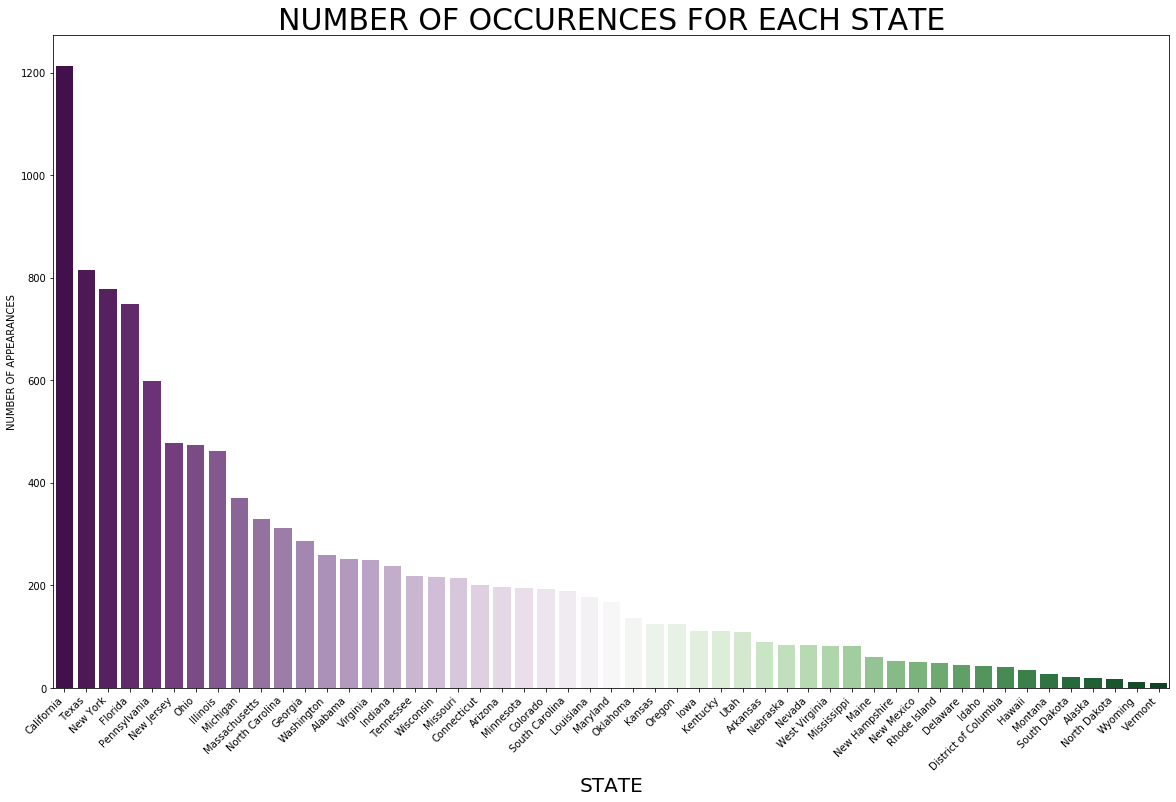

In [22]:
# Plotting the counts of instances from each state
fig, ax = plt.subplots(figsize=(20,12))
state_count = sns.barplot(x=list(solar['state_name'].value_counts().keys()),
                          y=solar['state_name'].value_counts(), palette='PRGn')
state_count.set_xticklabels(state_count.get_xticklabels(),
                      rotation=45, horizontalalignment='right')
plt.xlabel('STATE', size=20)
plt.ylabel('NUMBER OF APPEARANCES')
plt.title('NUMBER OF OCCURENCES FOR EACH STATE', fontsize=30)

In [23]:
# Changing the 'state_name' to a categorical data type
# Creating new numerical column representing the state name
# 0-50 due to inclusion of DC
solar.state_name = pd.Categorical(solar.state_name)
solar['state_cat'] = solar.state_name.cat.codes

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
solar.dropna(inplace=True)
solar.reset_index(drop=True, inplace=True)
print(solar.shape)
solar.isnull().sum()

(11423, 30)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


region_name                             0
state_name                              0
lat_avg                                 0
lng_avg                                 0
yearly_sunlight_kwh_kw_threshold_avg    0
count_qualified                         0
percent_covered                         0
percent_qualified                       0
number_of_panels_n                      0
number_of_panels_s                      0
number_of_panels_e                      0
number_of_panels_w                      0
number_of_panels_f                      0
number_of_panels_median                 0
number_of_panels_total                  0
kw_median                               0
kw_total                                0
yearly_sunlight_kwh_n                   0
yearly_sunlight_kwh_s                   0
yearly_sunlight_kwh_e                   0
yearly_sunlight_kwh_w                   0
yearly_sunlight_kwh_f                   0
yearly_sunlight_kwh_median              0
yearly_sunlight_kwh_total         

In [63]:
# Importing solar power generation data in the US
solar_usage = pd.read_excel('rates_excel.xlsx')

In [66]:
# Removing irrelevant columns
solar_usage = rates.loc[5:, :]

In [67]:
solar_usage

,units,source key,2001-01-01 00:00:00,2001-02-01 00:00:00,2001-03-01 00:00:00,2001-04-01 00:00:00,2001-05-01 00:00:00,2001-06-01 00:00:00,2001-07-01 00:00:00,2001-08-01 00:00:00,2001-09-01 00:00:00,2001-10-01 00:00:00,2001-11-01 00:00:00,2001-12-01 00:00:00,2002-01-01 00:00:00,2002-02-01 00:00:00,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,2003-01-01 00:00:00,2003-02-01 00:00:00,2003-03-01 00:00:00,2003-04-01 00:00:00,2003-05-01 00:00:00,2003-06-01 00:00:00,2003-07-01 00:00:00,2003-08-01 00:00:00,2003-09-01 00:00:00,2003-10-01 00:00:00,2003-11-01 00:00:00,2003-12-01 00:00:00,2004-01-01 00:00:00,2004-02-01 00:00:00,2004-03-01 00:00:00,2004-04-01 00:00:00,2004-05-01 00:00:00,2004-06-01 00:00:00,2004-07-01 00:00:00,2004-08-01 00:00:00,2004-09-01 00:00:00,2004-10-01 00:00:00,2004-11-01 00:00:00,2004-12-01 00:00:00,2005-01-01 00:00:00,2005-02-01 00:00:00,2005-03-01 00:00:00,2005-04-01 00:00:00,2005-05-01 00:00:00,2005-06-01 00:00:00,2005-07-01 00:00:00,2005-08-01 00:00:00,2005-09-01 00:00:00,2005-10-01 00:00:00,2005-11-01 00:00:00,2005-12-01 00:00:00,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,2006-09-01 00:00:00,2006-10-01 00:00:00,2006-11-01 00:00:00,2006-12-01 00:00:00,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,2007-11-01 00:00:00,2007-12-01 00:00:00,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,2008-10-01 00:00:00,2008-11-01 00:00:00,2008-12-01 00:00:00,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,2009-08-01 00:00:00,2009-09-01 00:00:00,2009-10-01 00:00:00,2009-11-01 00:00:00,2009-12-01 00:00:00,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,20

In [74]:
solar_usage.keys()[2:][0]

datetime.datetime(2001, 1, 1, 0, 0)

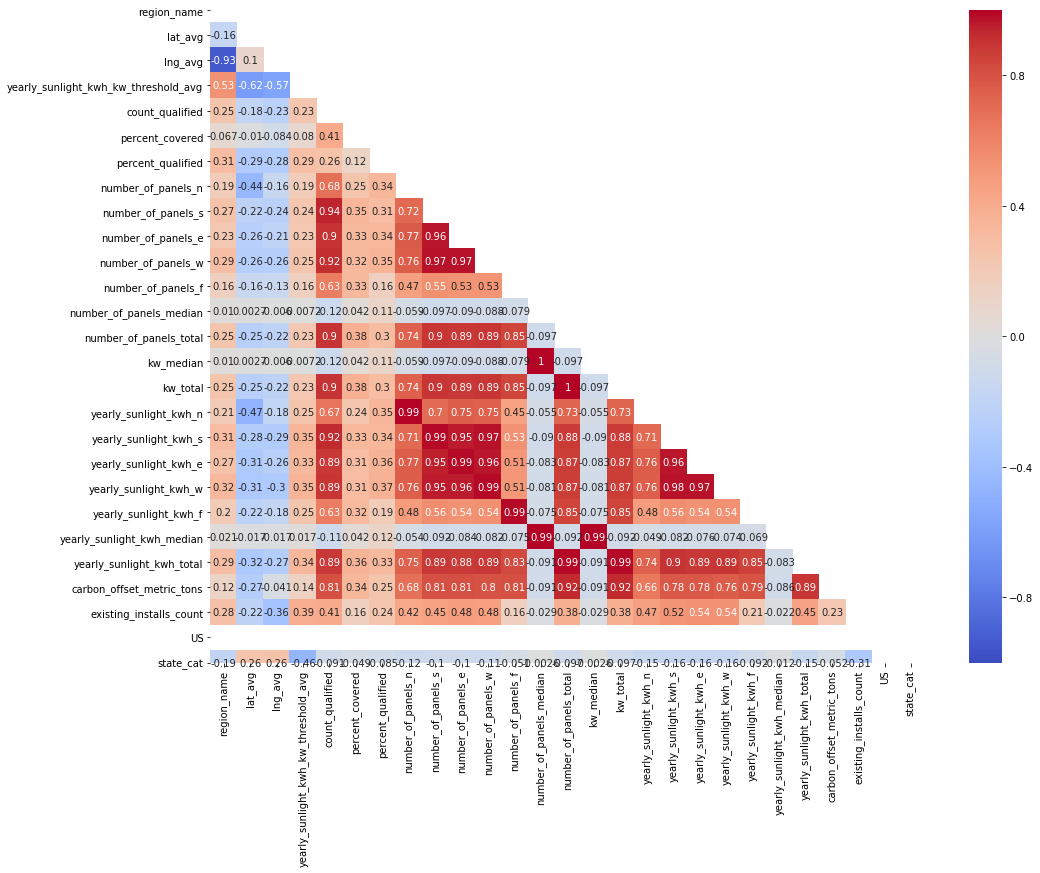

In [78]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(solar.corr())
sns.heatmap(solar.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [79]:
solar.head()


,region_name,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,US,state_cat
0,19149,Pennsylvania,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,(-75.0657051746548 40.0374044403417),1,38
1,74050,Oklahoma,36.077193,-96.067100,1097.35,7,100.000000,77.777778,0,34,27,75,20,11.0,156.0,2.75,39.00,0.000000e+00,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,"[[0,5],[5,1],[15,1]]",33.988079,0,(-96.0671000555555 36.0771932333333),1,36
2,19120,Pennsylvania,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,(-75.120887243506 40.0343982932811),1,38
3,19132,Pennsylvania,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,(-75.169645159245 39.9956814907579),1,38
4,19134,Pennsylvania,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,(-75.1119347717865 39.9924510629131),1,38


**Thoughts**
There are certain columns in this dataset that will serve well for mapping and other analysis, but will be irrelevant for model analysis. Will need to make a new data frame containing analysis variables.

In [80]:
solar_analysis = solar.drop(columns=['lat_avg', 'lng_avg', 'US', 'center_point'], axis=1)

In [82]:
solar_analysis.head()

,region_name,state_name,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,state_cat
0,19149,Pennsylvania,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,38
1,74050,Oklahoma,1097.35,7,100.000000,77.777778,0,34,27,75,20,11.0,156.0,2.75,39.00,0.000000e+00,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,"[[0,5],[5,1],[15,1]]",33.988079,0,36
2,19120,Pennsylvania,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,38
3,19132,Pennsylvania,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,38
4,19134,Pennsylvania,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,38


Need to look into the `install_size_kw_buckets` and pull that information out and into columns


In [98]:
install_kw_buckets = []
for i in solar['install_size_kw_buckets']:
    install_kw_buckets.append(ast.literal_eval(solar_analysis['install_size_kw_buckets'][i]))
    

KeyError: '[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,12],[30,7],[35,14],[40,7],[45,8],[50,3],[55,5],[60,6],[65,7],[70,1],[75,7],[80,2],[85,1],[90,4],[95,2],[100,4],[105,2],[110,1],[120,1],[125,3],[130,1],[135,1],[140,2],[145,1],[155,1],[160,2],[165,2],[190,2],[195,1],[220,1],[240,1],[285,2],[290,2],[300,1],[305,1],[320,1],[330,1],[340,1],[380,1],[385,1],[430,1],[445,1],[460,1],[475,1],[560,2],[565,1],[570,1],[575,1],[640,1],[735,1],[750,1],[830,1],[875,1],[1070,1],[1240,1],[1305,1],[1320,1]]'

In [102]:
solar['install_size_kw_buckets'].apply(ast.literal_eval(solar['install_size_kw_buckets']),
                                       axis=0)

ValueError: malformed node or string: 0        [[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...
1                                     [[0,5],[5,1],[15,1]]
2        [[0,4877],[5,722],[10,107],[15,67],[20,40],[25...
3        [[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...
4        [[0,5795],[5,831],[10,179],[15,117],[20,87],[2...
                               ...                        
11418            [[50,1],[110,1],[195,1],[915,1],[1125,1]]
11419                        [[5,2],[30,1],[65,1],[145,1]]
11420                       [[45,2],[50,1],[55,1],[390,1]]
11421                      [[65,2],[75,1],[100,1],[130,1]]
11422               [[0,1],[5,1],[670,1],[735,1],[1125,1]]
Name: install_size_kw_buckets, Length: 11423, dtype: object

In [94]:
import ast
ast.literal_eval(solar_analysis['install_size_kw_buckets'][0])

[0, 3888]

In [103]:
install_kw_buckets = []
for index, row in solar.iterrows():
    install_kw_buckets.append(ast.literal_eval(solar_analysis['install_size_kw_buckets'][index]))
    

In [107]:
solar['install_kw_buckets'] = install_kw_buckets

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
solar.drop(columns=['install_size_kw_buckets'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [110]:
solar.head()

,region_name,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point,US,state_cat,install_kw_buckets
0,19149,Pennsylvania,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,31147.899203,3,(-75.0657051746548 40.0374044403417),1,38,"[[0, 3888], [5, 430], [10, 80], [15, 39], [20,..."
1,74050,Oklahoma,36.077193,-96.067100,1097.35,7,100.000000,77.777778,0,34,27,75,20,11.0,156.0,2.75,39.00,0.000000e+00,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,33.988079,0,(-96.0671000555555 36.0771932333333),1,36,"[[0, 5], [5, 1], [15, 1]]"
2,19120,Pennsylvania,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,49734.525773,2,(-75.120887243506 40.0343982932811),1,38,"[[0, 4877], [5, 722], [10, 107], [15, 67], [20..."
3,19132,Pennsylvania,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,39597.801378,0,(-75.169645159245 39.9956814907579),1,38,"[[0, 4250], [5, 463], [10, 78], [15, 68], [20,..."
4,19134,Pennsylvania,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,84203.600230,3,(-75.1119347717865 39.9924510629131),1,38,"[[0, 5795], [5, 831], [10, 179], [15, 117], [2..."
